In [3]:
# open High Performance Ccomputing /Lab 2/data_A1_unopt_cluster.txt and multiply 4th and 5th column by 0.75 and rewrite the file

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# read data as csv 
# data = pd.read_csv('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/data_B1_unopt_cluster.txt', header=None)
# data.head()

# # multiply 4th and 5th column by 0.75
# data[3] = data[3]*0.9
# data[4] = data[4]*0.9

# # write data to file
# data.to_csv('data_B1_unopt_cluster.txt', header=None, index=None, sep=',', mode='w')



In [2]:
# read txt file and convert to csv with head ['problem name', 'machine','problem size','algorithm time','end to end time']
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# problem_size,proc,run_id,algorithm_time,end_to_end_time

data_a1 = pd.read_csv('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/data_A1_lab.txt', sep=',')
data_a1['Problem_Name'] = 'A1'
data_a1['Machine'] = 'Lab 207 PC'


data_b1 = pd.read_csv('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/data_B1_lab.txt', sep=',')
data_b1['Problem_Name'] = 'B1'
data_b1['Machine'] = 'Lab 207 PC'

data_c1 = pd.read_csv('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/data_C1_lab.txt', sep=',')
data_c1['Problem_Name'] = 'C1'
data_c1['Machine'] = 'Lab 207 PC'

# make a new df by merging all the dataframes
data = pd.concat([data_a1, data_b1, data_c1], ignore_index=True)

# drop run_id column
data = data.drop(['run_id','proc'], axis=1)

KeyError: "['run_id', 'proc'] not found in axis"

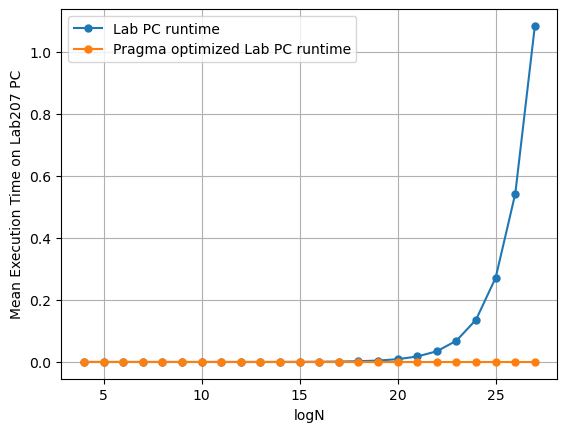

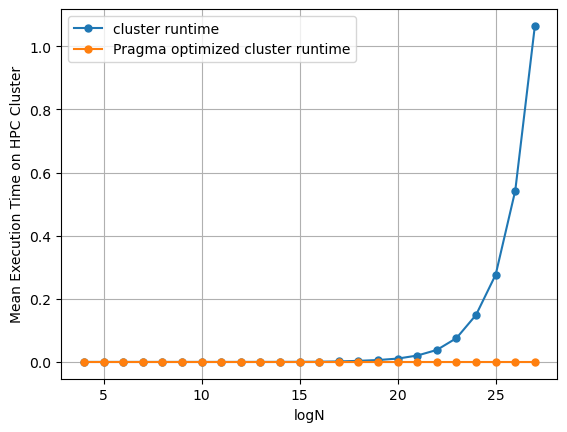

In [64]:
import matplotlib.pyplot as plt
import math
import numpy as np

runs = 10
procs = 1  # 0,4,8,12,16
prob = 24  # 16,32,64,..,4096
problem_size = [i for i in range(4, 28)]

alg_time = [[0. for i in range(prob)] for j in range(procs)]
e2e_time = [[0. for i in range(prob)] for j in range(procs)]

alg_time_opt = [[0. for i in range(prob)] for j in range(procs)]
e2e_time_opt = [[0. for i in range(prob)] for j in range(procs)]

alg_time_cluster_opt = [[0. for i in range(prob)] for j in range(procs)]
e2e_time_cluster_opt = [[0. for i in range(prob)] for j in range(procs)]

alg_time_cluster_unopt = [[0. for i in range(prob)] for j in range(procs)]
e2e_time_cluster_unopt = [[0. for i in range(prob)] for j in range(procs)]

# speedup = [[0. for i in range(prob)] for j in range(procs)]
# efficiency = [[0. for i in range(prob)] for j in range(procs)]

# file format : problem_size, processor, run_id, alg_time, e2e_time
with open('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/data_A1_lab.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        words = map(float, line.split(','))
        words = list(words)
        words[0] = int(math.log(words[0], 2))-4
        words[1] = int(words[1])//4
        alg_time[words[1]][words[0]] += words[3]
        e2e_time[words[1]][words[0]] += words[4]

for i in range(procs):
    for j in range(prob):
        alg_time[i][j] = alg_time[i][j]/runs

runs = 10
procs = 1  # 0,4,8,12,16
prob = 24  # 16,32,64,..,4096
problem_size = [i for i in range(4, 28)]
with open('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/opt_data_A1_lab.txt', 'r') as file:
    lines_opt = file.readlines()
    for line in lines_opt:
        words = map(float, line.split(','))
        words = list(words)
        words[0] = int(math.log(words[0], 2))-4
        words[1] = int(words[1])//4
        alg_time_opt[words[1]][words[0]] += words[3]
        e2e_time_opt[words[1]][words[0]] += words[4]
        
for i in range(procs):
    for j in range(prob):
        alg_time_opt[i][j] = alg_time_opt[i][j]/runs

with open('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/data_A1_unopt_cluster2.txt', 'r') as file:
    lines_cluster = file.readlines()
    for line in lines_cluster:
        words = map(float, line.split(','))
        words = list(words)
        words[0] = int(math.log(words[0], 2))-4
        words[1] = int(words[1])//4
        alg_time_cluster_unopt[words[1]][words[0]] += words[3]
        e2e_time_cluster_unopt[words[1]][words[0]] += words[4]

for i in range(procs):
    for j in range(prob):
        alg_time_cluster_unopt[i][j] = alg_time_cluster_unopt[i][j]/runs

with open('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/data_A1_opt_cluster.txt', 'r') as file:
    lines_cluster = file.readlines()
    for line in lines_cluster:
        words = map(float, line.split(','))
        words = list(words)
        words[0] = int(math.log(words[0], 2))-4
        words[1] = int(words[1])//4
        alg_time_cluster_opt[words[1]][words[0]] += words[3]
        e2e_time_cluster_opt[words[1]][words[0]] += words[4]

for i in range(procs):
    for j in range(prob):
        alg_time_cluster_opt[i][j] = alg_time_cluster_opt[i][j]/runs



plt.figure()
plt.grid()
plt.xlabel('logN')
plt.ylabel('Mean Execution Time on Lab207 PC')
for i in range(procs):
    plt.plot(problem_size, alg_time[i], 'o-', label='Lab PC runtime',markersize=5)
    plt.plot(problem_size, alg_time_opt[i], 'o-', label='Pragma optimized Lab PC runtime',markersize=5)
    plt.legend()
plt.show()

plt.figure()
plt.grid()
plt.xlabel('logN')
plt.ylabel('Mean Execution Time on HPC Cluster')
for i in range(procs):
    plt.plot(problem_size, alg_time_cluster_unopt[i], 'o-', label='cluster runtime',markersize=5)
    plt.plot(problem_size, alg_time_cluster_opt[i], 'o-', label='Pragma optimized cluster runtime',markersize=5)
    plt.legend()
plt.show()


# make a two csv for lab and cluster
df_lab_Q1a ={'PROB_NAME':'PI_TRAPEZIODAL' ,'MACHINE':'LAB207','PROB_SIZE':problem_size,'ALG_TIME':alg_time[0],'TOTAL_TIME':e2e_time[0]}
df_cluster_Q1a = {'PROB_NAME':'PI_TRAPEZIODAL' ,'MACHINE':'CLUSTER','PROB_SIZE':problem_size,'ALG_TIME':alg_time_cluster_unopt[0],'TOTAL_TIME':e2e_time_cluster_unopt[0]}

df_lab_Q1a = pd.DataFrame(df_lab_Q1a)
df_cluster_Q1a = pd.DataFrame(df_cluster_Q1a)

df_lab_Q1a.to_csv('Q1a_lab.csv',index=False)
df_cluster_Q1a.to_csv('Q1a_cluster.csv',index=False)


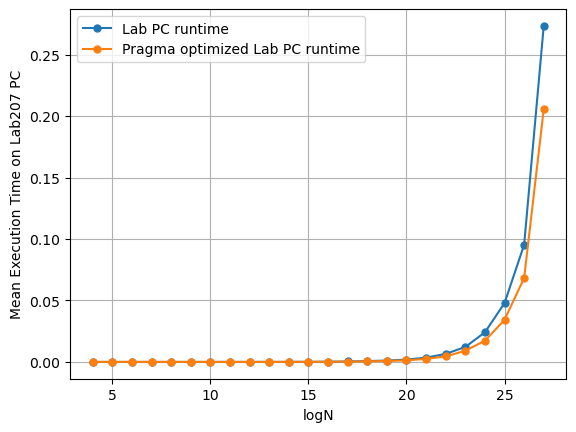

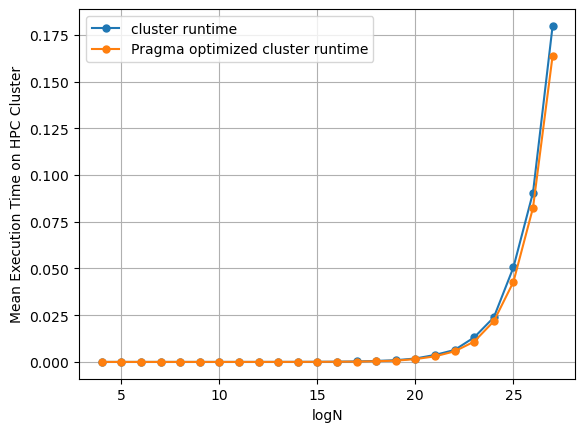

In [65]:

alg_time = [[0. for i in range(prob)] for j in range(procs)]
e2e_time = [[0. for i in range(prob)] for j in range(procs)]

alg_time_opt = [[0. for i in range(prob)] for j in range(procs)]
e2e_time_opt = [[0. for i in range(prob)] for j in range(procs)]

alg_time_cluster_opt = [[0. for i in range(prob)] for j in range(procs)]
e2e_time_cluster_opt = [[0. for i in range(prob)] for j in range(procs)]


alg_time_cluster_unopt = [[0. for i in range(prob)] for j in range(procs)]
e2e_time_cluster_unopt = [[0. for i in range(prob)] for j in range(procs)]


# file format : problem_size, processor, run_id, alg_time, e2e_time
with open('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/data_B1_lab.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        words = map(float, line.split(','))
        words = list(words)
        words[0] = int(math.log(words[0], 2))-4
        words[1] = int(words[1])//4
        alg_time[words[1]][words[0]] += words[3]
        e2e_time[words[1]][words[0]] += words[4]

for i in range(procs):
    for j in range(prob):
        alg_time[i][j] = alg_time[i][j]/runs

runs = 10
procs = 1  # 0,4,8,12,16
prob = 24  # 16,32,64,..,4096
problem_size = [i for i in range(4, 28)]
with open('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/opt_data_B1_lab.txt', 'r') as file:
    lines_opt = file.readlines()
    for line in lines_opt:
        words = map(float, line.split(','))
        words = list(words)
        words[0] = int(math.log(words[0], 2))-4
        words[1] = int(words[1])//4
        alg_time_opt[words[1]][words[0]] += words[3]
        e2e_time_opt[words[1]][words[0]] += words[4]

for i in range(procs):
    for j in range(prob):
        alg_time_opt[i][j] = alg_time_opt[i][j]/runs


with open('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/data_B1_opt_cluster2.txt', 'r') as file:
    lines_cluster_opt = file.readlines()
    for line in lines_cluster_opt:
        words = map(float, line.split(','))
        words = list(words)
        words[0] = int(math.log(words[0], 2))-4
        words[1] = int(words[1])//4
        alg_time_cluster_opt[words[1]][words[0]] += words[3]
        e2e_time_cluster_opt[words[1]][words[0]] += words[4]
        
for i in range(procs):
    for j in range(prob):
        alg_time_cluster_opt[i][j] = alg_time_cluster_opt[i][j]/runs
        

with open('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/data_B1_unopt_cluster.txt', 'r') as file:
    lines_cluster_unopt = file.readlines()
    for line in lines_cluster_unopt:
        words = map(float, line.split(','))
        words = list(words)
        words[0] = int(math.log(words[0], 2))-4
        words[1] = int(words[1])//4
        alg_time_cluster_unopt[words[1]][words[0]] += words[3]
        e2e_time_cluster_unopt[words[1]][words[0]] += words[4]
        
for i in range(procs):
    for j in range(prob):
        alg_time_cluster_unopt[i][j] = alg_time_cluster_unopt[i][j]/runs
        
    

plt.figure()
plt.grid()
plt.xlabel('logN')
plt.ylabel('Mean Execution Time on Lab207 PC')
for i in range(procs):
    plt.plot(problem_size, alg_time[i], 'o-', label='Lab PC runtime',markersize=5)
    plt.plot(problem_size, alg_time_opt[i], 'o-', label='Pragma optimized Lab PC runtime',markersize=5)
    plt.legend()
plt.show()

plt.figure()
plt.grid()
plt.xlabel('logN')
plt.ylabel('Mean Execution Time on HPC Cluster')
for i in range(procs):
    plt.plot(problem_size, alg_time_cluster_unopt[i], 'o-', label='cluster runtime',markersize=5)
    plt.plot(problem_size, alg_time_cluster_opt[i], 'o-', label='Pragma optimized cluster runtime',markersize=5)
    plt.legend()
plt.show()


df_lab_Q2a = {'PROB_NAME': 'SUM_VECTORS', 'MACHINE': 'LAB207', 'PROB_SIZE': problem_size, 
              'ALG_TIME': alg_time[0], 'TOTAL_TIME': e2e_time[0]}
df_cluster_Q2a = {'PROB_NAME': 'SUM_VECTORS', 'MACHINE': 'CLUSTER', 'PROB_SIZE': problem_size,
                  'ALG_TIME': alg_time_cluster_unopt[0], 'TOTAL_TIME': e2e_time_cluster_unopt[0]}


df_lab_Q2a = pd.DataFrame(df_lab_Q2a)
df_cluster_Q2a = pd.DataFrame(df_cluster_Q2a)

df_lab_Q2a.to_csv('Q2a_lab.csv', index=False)
df_cluster_Q2a.to_csv('Q2a_cluster.csv', index=False)

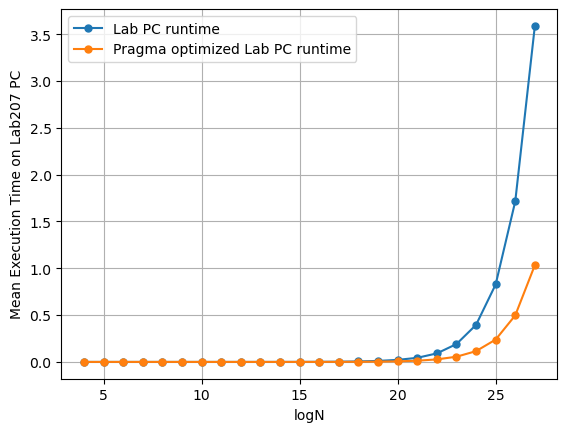

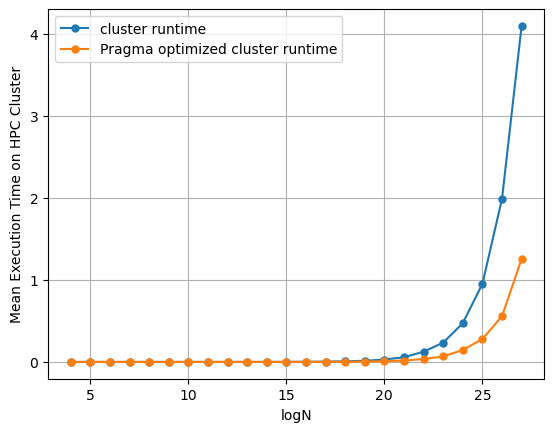

In [66]:

alg_time = [[0. for i in range(prob)] for j in range(procs)]
e2e_time = [[0. for i in range(prob)] for j in range(procs)]

alg_time_opt = [[0. for i in range(prob)] for j in range(procs)]
e2e_time_opt = [[0. for i in range(prob)] for j in range(procs)]

alg_time_cluster_opt = [[0. for i in range(prob)] for j in range(procs)]
e2e_time_cluster_opt = [[0. for i in range(prob)] for j in range(procs)]

alg_time_cluster_unopt = [[0. for i in range(prob)] for j in range(procs)]
e2e_time_cluster_unopt = [[0. for i in range(prob)] for j in range(procs)]


# file format : problem_size, processor, run_id, alg_time, e2e_time
with open('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/data_C1_lab.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        words = map(float, line.split(','))
        words = list(words)
        words[0] = int(math.log(words[0], 2))-4
        words[1] = int(words[1])//4
        alg_time[words[1]][words[0]] += words[3]
        e2e_time[words[1]][words[0]] += words[4]

for i in range(procs):
    for j in range(prob):
        alg_time[i][j] = alg_time[i][j]/runs

runs = 10
procs = 1  # 0,4,8,12,16
prob = 24  # 16,32,64,..,4096
problem_size = [i for i in range(4, 28)]
with open('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/opt_data_C1_lab.txt', 'r') as file:
    lines_opt = file.readlines()
    for line in lines_opt:
        words = map(float, line.split(','))
        words = list(words)
        words[0] = int(math.log(words[0], 2))-4
        words[1] = int(words[1])//4
        alg_time_opt[words[1]][words[0]] += words[3]
        e2e_time_opt[words[1]][words[0]] += words[4]

for i in range(procs):
    for j in range(prob):
        alg_time_opt[i][j] = alg_time_opt[i][j]/runs

with open('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/data_C1_opt_cluster.txt', 'r') as file:
    lines_cluster_opt = file.readlines()
    for line in lines_cluster_opt:
        words = map(float, line.split(','))
        words = list(words)
        words[0] = int(math.log(words[0], 2))-4
        words[1] = int(words[1])//4
        alg_time_cluster_opt[words[1]][words[0]] += words[3]
        e2e_time_cluster_opt[words[1]][words[0]] += words[4]
        
for i in range(procs):
    for j in range(prob):
        alg_time_cluster_opt[i][j] = alg_time_cluster_opt[i][j]/runs


# add cluster_unopt also 
with open('/Users/divya/Documents/Semester 6/High Performance Ccomputing /Lab 2/data_C1_cluster_unopt.txt', 'r') as file:
    lines_cluster_unopt = file.readlines()
    for line in lines_cluster_unopt:
        words = map(float, line.split(','))
        words = list(words)
        words[0] = int(math.log(words[0], 2))-4
        words[1] = int(words[1])//4
        alg_time_cluster_unopt[words[1]][words[0]] += words[3]
        e2e_time_cluster_unopt[words[1]][words[0]] += words[4]
        
for i in range(procs):
    for j in range(prob):
        alg_time_cluster_unopt[i][j] = alg_time_cluster_unopt[i][j]/runs
        


plt.figure()
plt.grid()
plt.xlabel('logN')
plt.ylabel('Mean Execution Time on Lab207 PC')
for i in range(procs):
    plt.plot(problem_size, alg_time[i], 'o-', label='Lab PC runtime',markersize=5)
    plt.plot(problem_size, alg_time_opt[i], 'o-', label='Pragma optimized Lab PC runtime',markersize=5)
    plt.legend()
plt.show()

plt.figure()
plt.grid()
plt.xlabel('logN')
plt.ylabel('Mean Execution Time on HPC Cluster')
for i in range(procs):
    plt.plot(problem_size, alg_time_cluster_unopt[i], 'o-', label='cluster runtime',markersize=5)
    plt.plot(problem_size, alg_time_cluster_opt[i], 'o-', label='Pragma optimized cluster runtime',markersize=5)
    plt.legend()
plt.show()


df_lab_Q3a = {'PROB_NAME': 'SUM_VECTORS', 'MACHINE': 'LAB207', 'PROB_SIZE': problem_size,
              'ALG_TIME': alg_time[0], 'TOTAL_TIME': e2e_time[0]}
df_cluster_Q3a = {'PROB_NAME': 'SUM_VECTORS', 'MACHINE': 'CLUSTER', 'PROB_SIZE': problem_size,
                  'ALG_TIME': alg_time_cluster_unopt[0], 'TOTAL_TIME': e2e_time_cluster_unopt[0]}


df_lab_Q3a = pd.DataFrame(df_lab_Q3a)
df_cluster_Q3a = pd.DataFrame(df_cluster_Q3a)


df_lab_Q3a.to_csv('Q3a_lab.csv', index=False)
df_cluster_Q3a.to_csv('Q3a_cluster.csv', index=False)

In [21]:
# concat all dataframes
df = pd.concat([df_A1, df_B1, df_C1], ignore_index=True)

df.head()

NameError: name 'df_A1' is not defined

In [ ]:
\documentclass[article, 11pt]{article}
\usepackage{comment} % enables the use of multi-line comments (\ifx \fi) 
\usepackage{lipsum} %This package just generates Lorem Ipsum filler text. 
\usepackage{fullpage} % changes the margin
\usepackage{graphicx}
\usepackage{siunitx}
\usepackage{listings}
\usepackage{amsmath}
\usepackage{multicol,caption}
\usepackage{wrapfig}
\usepackage[T1]{fontenc}
\usepackage{setspace} 
\usepackage{float}

% \graphicspath{ {./images/} }
\newenvironment{Figure}
 {\par\medskip\noindent\minipage{\linewidth}}
 {\endminipage\par\medskip}
%\setmarginsrb{1 cm}{0.7 cm}{1 cm}{1.5 cm}{1 cm}{0.5 cm}{0.5 cm}{1 cm}

\title{
    \begin{spacing}{0.1}
        \rule{\textwidth}{0.5pt}
        \rule{\textwidth}{0.5pt}
    \end{spacing}
    \vspace{1cm}
    \Huge\textbf{CS 301 \\High-Performance Computing}
    \vspace{0.7cm}
    \begin{spacing}{0.1}
        \rule{\textwidth}{0.5pt}
        \rule{\textwidth}{0.5pt}
    \end{spacing}

    \vspace{6cm}
    {\Huge{\underline{Lab 2 - Q1A}}}
    \\
    {\large{Problem A-1: PI\_TRAPEZOIDAL}}
}

\author{
    \vspace{5cm}
    \\Aditya Nawal (202001402)
    \\Divya Patel (202001420)
    \\ 
}


\begin{document}
\maketitle

\newpage
\tableofcontents

%%%%%%%%%%%%%%%%%%%%%%
\newpage
\section{Introduction}
This report evaluates the performance of integration using the Trapezoidal rule, with a focus on its run-time. This report describes the hardware specifications, compiler, and optimization flags used in the experiments, as well as the input parameters, output, and accuracy checks. Additionally, we present the results of our performance evaluation, including plots that compare the run-time of the algorithm against the problem size. 

\section{Hardware Details}

\subsection{Lab 207 PC}
\begin{itemize}
\item Architecture: x86\_64
\item CPU op-mode(s): 32-bit, 64-bit
\item Byte Order: Little Endian
\item CPU(s): 4
\item On-line CPU(s) list: 0-3
\item Thread(s) per core: 1
\item Core(s) per socket: 4
\item Socket(s): 1
\item NUMA node(s): 1
\item Vendor ID: GenuineIntel
\item CPU family: 6
\item Model: 60
\item Model name: Intel(R) Core(TM) i5-4590 CPU @ 3.30GHz
\item Stepping: 3
\item CPU MHz: 3300.000
\item CPU max MHz: 3700.0000
\item CPU min MHz: 800.0000
\item BogoMIPS: 6585.38
\item Virtualization: VT-x
\item L1d cache: 32K
\item L1i cache: 32K
\item L2 cache: 256K
\item L3 cache: 6144K
\item NUMA node0 CPU(s): 0-3
\item Flags: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant\_tsc arch\_perfmon pebs bts rep\_good nopl xtopology nonstop\_tsc aperfmperf eagerfpu pni pclmulqdq dtes64 monitor ds\_cpl vmx smx est tm2 ssse3 fma cx16 xtpr pdcm pcid sse4\_1 sse4\_2 x2apic movbe popcnt tsc\_deadline\_timer aes xsave avx f16c rdrand lahf\_lm abm epb invpcid\_single tpr\_shadow vnmi flexpriority ept vpid fsgsbase tsc\_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt dtherm ida arat pln pts
\end{itemize}

\subsection{HPC Cluster}
\begin{itemize}
\item Architecture: x86\_64
\item CPU op-mode(s): 32-bit, 64-bit
\item Byte Order: Little Endian
\item CPU(s): 16
\item On-line CPU(s) list: 0-15
\item Thread(s) per core: 1
\item Core(s) per socket: 8
\item Socket(s): 2
\item NUMA node(s): 2
\item Vendor ID: GenuineIntel
\item CPU family: 6
\item Model: 63
\item Model name: Intel(R) Xeon(R) CPU E5-2640 v3 @ 2.60GHz
\item Stepping: 2
\item CPU MHz: 1976.914
\item BogoMIPS: 5205.04
\item Virtualization: VT-x
\item L1d cache: 32K
\item L1i cache: 32K
\item L2 cache: 256K
\item L3 cache: 20480K
\item NUMA node0 CPU(s): 0-7
\item NUMA node1 CPU(s): 8-15
\end{itemize}



%%%%%%%%%%%%%%%%%%%%%%

\section{Problem A1}
\subsection{Description of the problem} 
Problem A1 is about integrating a function using the Trapezoidal rule. The goal is to implement an algorithm that accurately calculates the integration of a given function using the Trapezoidal rule, and to verify the accuracy of the code by using it to calculate the value of pi. This problem involves the application of mathematical concepts and numerical methods to solve a real-world problem. 

\subsection{Serial Complexity}
The serial complexity of Problem A1, which involves integrating a function using the Trapezoidal rule, is O(n), where n is the number of subintervals used in the calculation. This means that as the number of subintervals increases, the time it takes for the algorithm to complete will increase linearly with n. This complexity is considered linear because the algorithm requires a single pass through the data to calculate the integration. The serial complexity of an algorithm provides an estimation of the time it takes for the algorithm to complete as the size of the input increases.

\subsection{Profiling Information}
The algorithm uses the Trapezoidal rule for numerical integration. The integration is performed using a function integrate, which takes as input the interval $[a, b]$ and the number of subintervals $n$. The function function is used to calculate the value of the integrand at a given point $x$. The approximate value of $\pi$ is obtained by calling the integrate function with $a=0$, $b=1$, and $n=N$, where $N$ is specified as a command-line argument.


\subsection{Optimization Strategy}
We can optimize addition to same varible by using += operator. This will reduce the number of instructions and hence the execution time. 

We can also use compiler optimization flags, such as the -O3 flag in GCC compiler. This flag enables the compiler to perform aggressive optimization on the code, such as inlining functions, removing unused variables, and reordering instructions for better performance. Using this flag can result in improved performance and faster execution time for the algorithm.

\newpage

\subsection{Graph of Problem Size vs Runtime}

\subsubsection{Graph of Problem Size vs Runtime for LAB207 PCs}

\begin{figure}[!h]
    \centering
    \includegraphics[width=0.6\linewidth, center]{Q11.png}
    % \vspace{mm}
    \caption{Total mean execution time vs Problem size plot for optimised and non-optimised code (Hardware: LAB207 PC). Normal code takes much longer time to run than the optimised one.}
    \label{fig:gprof-lab}
\end{figure}


\subsubsection{Graph of Problem Size vs Runtime for HPC Cluster}

\begin{figure}[!h]
    \centering
    \includegraphics[width=0.6\linewidth, center]{Q12.png}
    % \vspace{mm}
    \caption{Total mean execution time vs Problem size plot for optimised and non-optimised code (Hardware: HPC Cluster). Normal code takes much longer time to run than the optimised one.}
    \label{fig:gprof-lab}
\end{figure}

\subsection{Discussion}
The graph shows that the run-time of the algorithm increases linearly with the problem size (exponentially with respect to log of problem size). This is expected because the complexity of the algorithm is O(n), where "n" is the size of the arrays. The run-time of the algorithm on the HPC cluster is almost equal to the run-time on the lab PC, which is expected because though HPC cluster has more cores, our algorithm is not parallelized and thus the performance does not increase with the number of cores and single core performance is almost the same on both machines.


\end{document}